In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('./data/sample/human_test_vlen.txt',header=None, encoding='utf-8',names=['seq'])
test.loc[:,'data_type']='test'
val = pd.read_csv('./data/sample/human_val_vlen.txt',header=None, encoding='utf-8',names=['seq'])
val.loc[:,'data_type']='val'
train = pd.read_csv('./data/sample/human_train_vlen.txt',header=None, encoding='utf-8',names=['seq'])
train.loc[:,'data_type']='train'

data=pd.concat([test,val,train])
data['seq_len'] = data.seq.str.len()
len(data), len(val), len(test), len(train)

(510101, 76515, 76515, 357071)

# Check output of trained model

In [1]:
from ablstm import ModelLSTM
model = ModelLSTM(embedding_dim=64, hidden_dim=64, device='cuda', gapped=True, fixed_len=False)
model.load(fn='./saved_models/human/lstm_0.704043.npy')

SyntaxError: invalid syntax (ablstm.py, line 62)

In [11]:
tst_fn = './data/sample/human_test.txt'
tst_scores = model.eval(fn=tst_fn, batch_size=512)


100%|| 76515/76515 [00:10<00:00, 7154.50seq/s]


In [16]:
scores= pd.DataFrame(data=tst_scores, columns=['scores'])
scores.head(2)

,scores
0,3.697726
1,2.639605


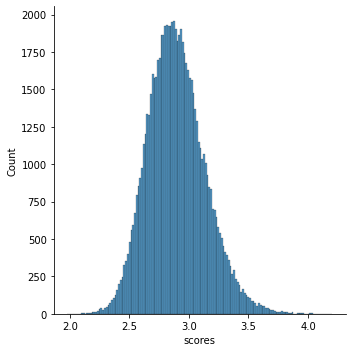

In [17]:
sns.displot(scores.scores)

In [ ]:
show accuracy on validation set